In [9]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('Credit_cleaned_data.csv')
data.head(5)

,Transaction ID,Date,Time,Amount,Age,Fraud,Day of Week_Friday,Day of Week_Thursday,Day of Week_Tuesday,Day of Week_Wednesday,...,Bank_Barlcays,Bank_HSBC,Bank_Halifax,Bank_Lloyds,Bank_Metro,Bank_Monzo,Bank_RBS,Gender_F,Gender_M,target
0,3577209,20201014,19,5,25,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,3039221,20201014,17,288,49,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
2,2694780,20201014,14,5,42,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,2640960,20201013,14,28,51,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,2771031,20201013,23,91,38,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,1


In [10]:
data = data.drop('target', axis=1)
data

,Transaction ID,Date,Time,Amount,Age,Fraud,Day of Week_Friday,Day of Week_Thursday,Day of Week_Tuesday,Day of Week_Wednesday,...,Bank_Barclays,Bank_Barlcays,Bank_HSBC,Bank_Halifax,Bank_Lloyds,Bank_Metro,Bank_Monzo,Bank_RBS,Gender_F,Gender_M
0,3577209,20201014,19,5,25,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
1,3039221,20201014,17,288,49,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,2694780,20201014,14,5,42,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
3,2640960,20201013,14,28,51,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
4,2771031,20201013,23,91,38,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3203892,20201013,22,15,53,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
99996,3304849,20201014,23,7,45,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
99997,3532129,20201013,11,21,46,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
99998,3107092,20201014,22,25,48,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1


In [13]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3) 
kmeans.fit(data)
labels = kmeans.labels_
print(labels)

[1 2 0 ... 1 2 1]


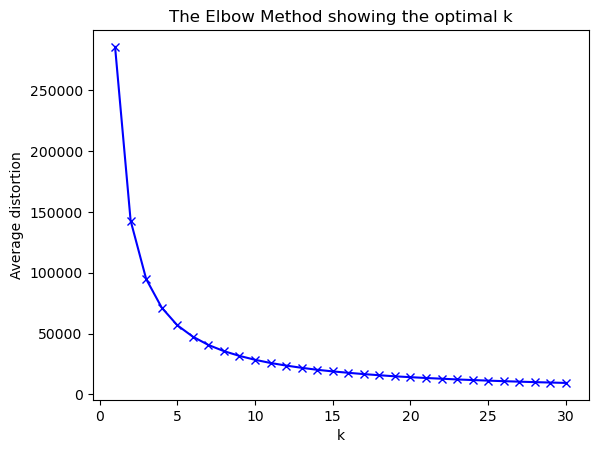

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
data = pd.read_csv('Credit_cleaned_data.csv')
distortions = []
K = range(1, 31)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data)
    distortions.append(sum(np.min(cdist(data, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / data.shape[0])

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
data = pd.read_csv('Credit_cleaned_data.csv')
n_clusters = 3
model = AgglomerativeClustering(n_clusters=n_clusters)
model.fit(data)
Z = linkage(data, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestClassifier
data = pd.read_csv('Credit_cleaned_data.csv')
X = data.drop('target', axis=1)
y = data['target']
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
sfs = SequentialFeatureSelector(clf, k_features='best', forward=True, floating=False, scoring='accuracy', cv=5)
sfs = sfs.fit(X, y)
selected_features = list(sfs.k_feature_names_)
print(selected_features)

In [ ]:
from sklearn.decomposition import PCA
data = pd.read_csv('Credit_cleaned_data.csv')
pca = PCA(n_components=0.95)
pca.fit(data)
explained_variance = pca.explained_variance_
print("Cumulative explained variance: {:.2f}".format(np.cumsum(explained_variance)))
plt.bar(range(len(explained_variance)), explained_variance)
plt.xlabel('PCA Component')
plt.ylabel('Proportion of Variance')
plt.title('Variance explained by PCA components')
plt.show()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
data = pd.read_csv('Credit_cleaned_data.', headcsver=None)
X = data.iloc[:, 2:]  
y = data.iloc[:, 1]   
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy using the transformed dataset: {:.2f}%".format(accuracy * 100))